# Stocks data, visual exploration demo

In this demo, we are going to have a look at the stock price of four companies, and explore how they co-vary over time.

In [1]:
%matplotlib inline

import pandas as pd
import pandas.io.data as web
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')

We start by downloading the daily data from Yahoo, using the `web` module of Pandas.

In [2]:
# Download daily data about this companies, starting in January, 1st, 2000.
# AAPL: Apple
# MSFT: Microsoft
# DELL: Dell
# XOM: Exxon
stock = web.get_data_yahoo(['AAPL', 'MSFT', 'DELL', 'XOM'], '1/1/2000')

In [3]:
# Load the data locally if there is no internet connection
# item_list = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']
# data = {}
# for item in item_list:
#     data[item] = pd.read_csv("{}_data_since_2000.csv".format(item), index_col=0, parse_dates=True)
# stock = pd.Panel(data)

The "adjusted close" data frame indicates the price of each stock at the end of the day.

In [4]:
adj_close = stock['Adj Close']
adj_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3867 entries, 2000-01-03 to 2015-04-20
Data columns (total 4 columns):
AAPL    3847 non-null float64
DELL    3498 non-null float64
MSFT    3847 non-null float64
XOM     3847 non-null float64
dtypes: float64(4)
memory usage: 151.1 KB


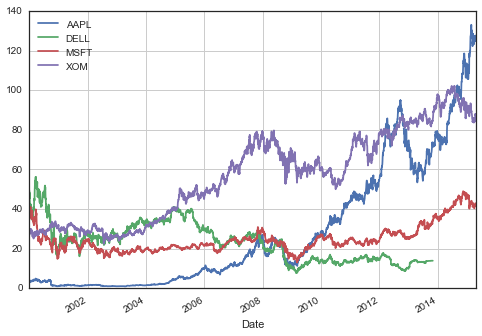

In [5]:
adj_close.plot();

We would like to know how each stock price is predictive of the others. We start by looking at the joint distribution of two of them.

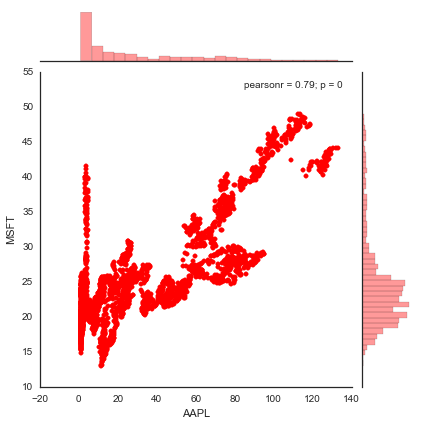

In [6]:
sns.jointplot('AAPL', 'MSFT', data=adj_close, color='Red');

We can also create a grid with all pairs of scatter plots between stocks.

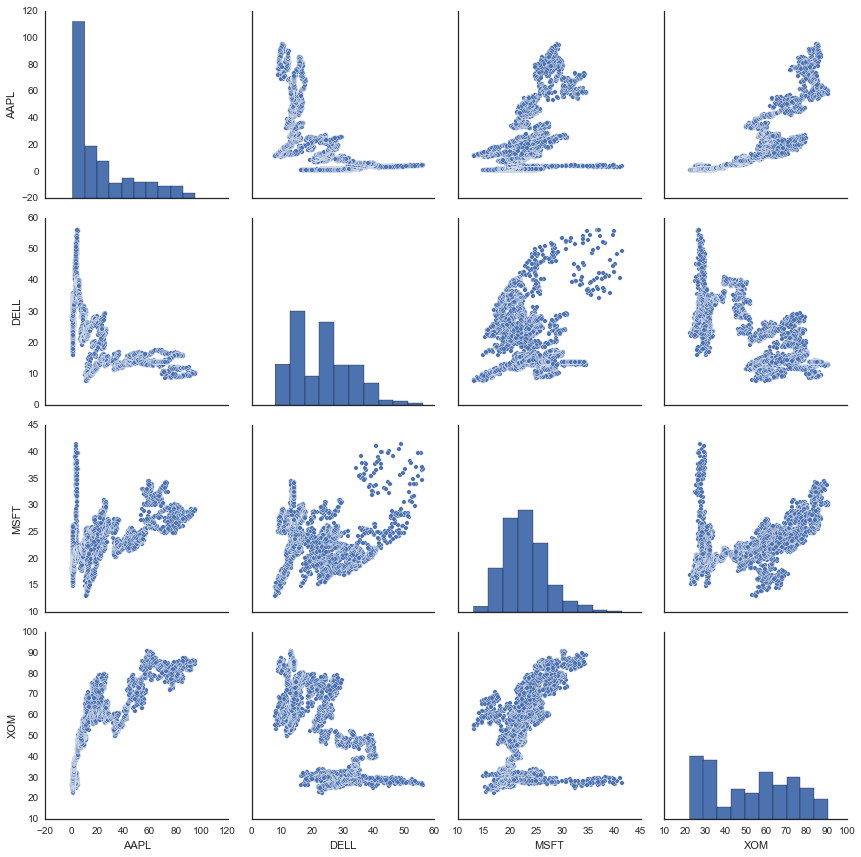

In [7]:
sns.pairplot(adj_close.dropna());

With the `hue` keyboard we can add extra information as color on top of the scatter plot, in this case the year.

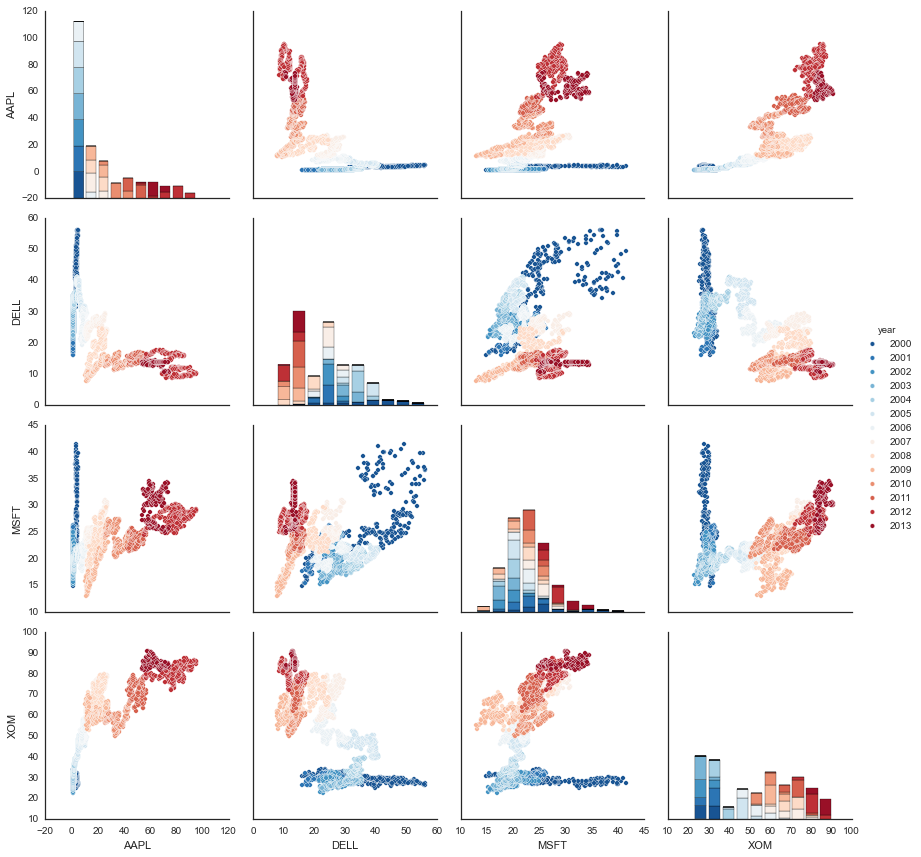

In [8]:
adj_with_year = adj_close.copy()
adj_with_year['year'] = adj_with_year.index.year
sns.pairplot(adj_with_year.dropna(), vars=adj_close.columns, hue='year', palette='RdBu_r');

The behavior of each pair of stocks is quite erratic, and we would have a hard time modelling it. One issue is that the prices have a non-linear behavior, and have larger variations when the price is higher.

To compensate for that, we can look at the *percent change* in price.

In [9]:
returns = adj_close.apply(lambda x: x.pct_change())

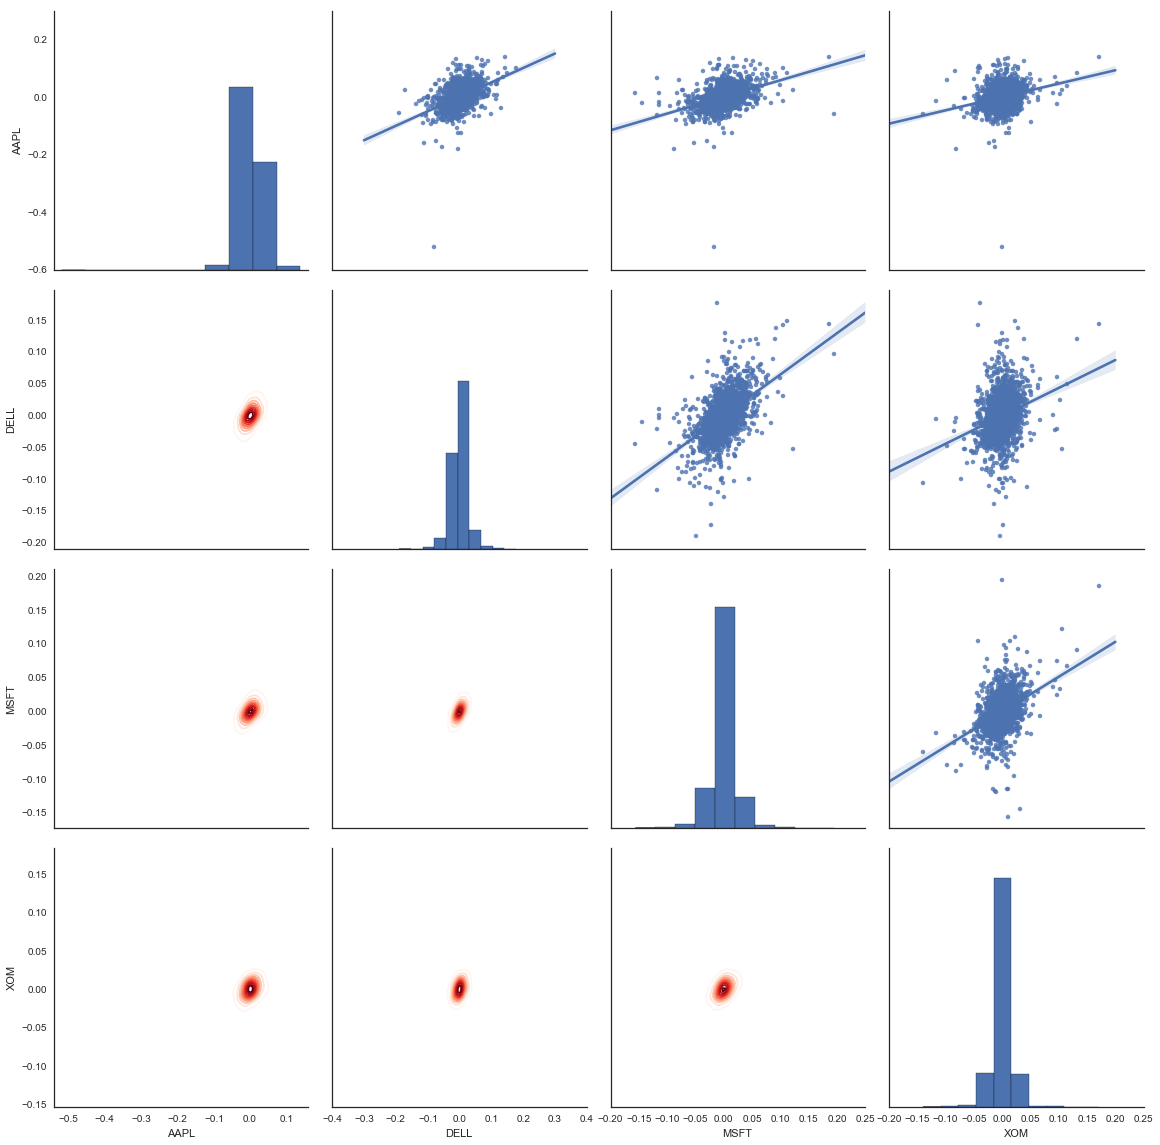

In [10]:
grid = sns.PairGrid(returns.dropna(), size=4)
grid.map_upper(sns.regplot)
grid.map_diag(plt.hist)
grid.map_lower(sns.kdeplot, cmap='Reds');

The joint distributions of the percent changes seem to be better behave, and to be positively correlated among stocks.

Does the correlation change with time?

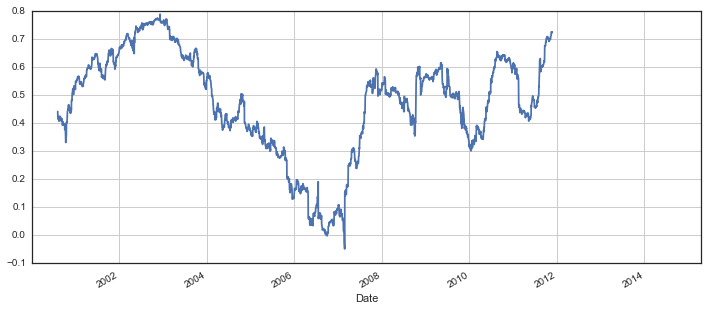

In [11]:
returns.MSFT.rolling(150).corr(returns.DELL).plot(figsize=(12,5));